In [1]:
#2021.07.05. MON
#Hankyeong

##CH07. Simple RNN 
#00. 패키지 호출
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from scipy.linalg import toeplitz

#00-1. 시각화 옵션 설정
%matplotlib inline

#00-2. warning message ignore
warnings.filterwarnings(action='ignore')

#00-3. 씨드넘버 설정
np.random.seed(2021)
tf.random.set_seed(2021)


In [2]:
#01. Many to one 문제 해결하기. 
#(1) 데이터셋 정의하기. 
s = np.sin(2*np.pi/8. * np.arange(20))
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01])

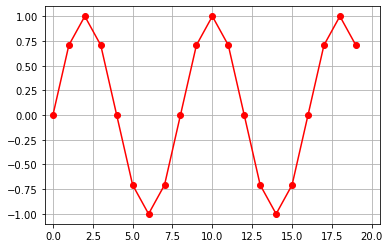

In [3]:
#(2) 데이터셋 시각화하기. 
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

In [4]:
#(3) 원래의 시계열 벡터를 Toeplitz Matrix(퇴플리츠 행렬=대각선 위의 성분들이 같은 정사각 행렬) 형태로 변환하기. 
#    WHY? 
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0]-2)], s[::-1]))

#(4) 변환한 행렬 구조 확인하기. 
S.shape

(19, 20)

In [5]:
#(4) train, test 데이터셋 분할하기. 
X_train = S[:-1, :3][:, :, np.newaxis]
y_train = S[:-1, 3]

#(5) train, test 데이터셋 구조 확인하기. 
X_train.shape, y_train.shape

((18, 3, 1), (18,))

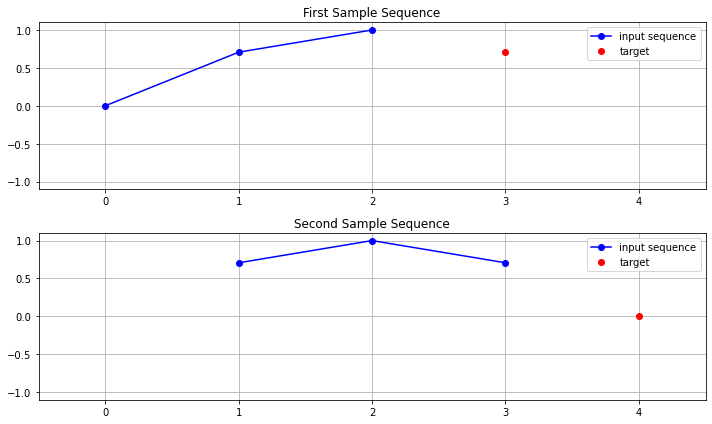

In [6]:
#PLUS. RNN의 workflow 확인하기. 
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot([0,1,2], X_train[0].flatten(), 'bo-', label='input sequence')
plt.plot([3],y_train[0], 'ro', label='target')
plt.xlim(-0.5,4.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.grid()
plt.title('First Sample Sequence')
plt.subplot(212)
plt.plot([1,2,3], X_train[1].flatten(), 'bo-', label='input sequence')
plt.plot([4],y_train[1], 'ro', label='target')
plt.xlim(-0.5,4.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.grid()
plt.title('Second Sample Sequence')
plt.tight_layout() 
plt.show()

In [7]:
#02. Simple RNN 모델 생성하기. 
#(1) 모델 정의하기. 
model = Sequential([
    SimpleRNN(5, input_shape=(3,1), activation='tanh'), 
    Dense(1, activation='linear')
])

#(2) 모델의 요약정보 확인하기. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


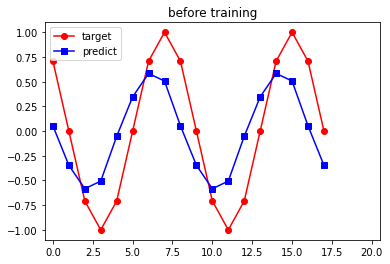

In [8]:
#(3) 모델의 compile 설정하기. 
model.compile(optimizer='adam', loss='mse')

#(4) 모델의 훈련 전 예측 시각화하기. 
plt.plot(y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='predict')
plt.xlim(-0.5,20.5) 
plt.ylim(-1.1,1.1)
plt.legend(),
plt.title('before training')
plt.show()

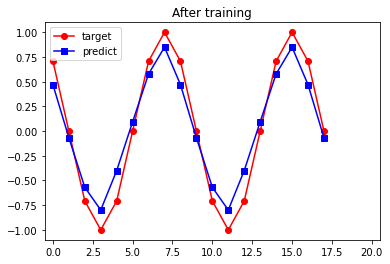

In [9]:
#(5) 모델 학습하기. 
model_fit = model.fit(X_train, y_train, epochs=100, verbose=0)

#(6) 모델의 훈련 후 예측 시각화하기. 
plt.plot(y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='predict')
plt.xlim(-0.5,20.5); plt.ylim(-1.1,1.1)
plt.legend(); plt.title("After training")
plt.show()

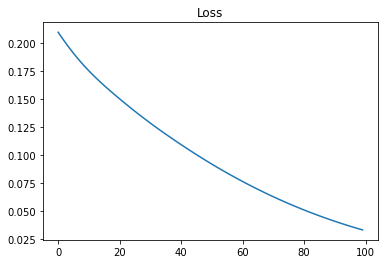

In [10]:
#(7) 훈련 과정의 손실함수 시각화하기. 
plt.plot(model_fit.history['loss'])
plt.title('Loss')
plt.show()

In [11]:
#04. RNN unit(node)을 20으로 확장하기. 
#(1) 모델 정의하기. 
model_2 = Sequential([
    SimpleRNN(20, input_shape=(3,1), activation='tanh'), 
    Dense(1, activation='linear')
])

#(2) 모델의 요약정보 확인하기. 
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


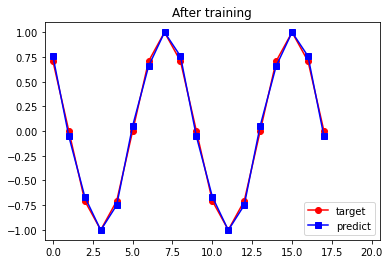

In [12]:
#(3) 모델의 compile 설정하기. 
model_2.compile(optimizer='adam', loss='mse')

#(4) 모델 학습하기. 
model_2_fit = model_2.fit(X_train, y_train, epochs=100, verbose=0)

#(5) 모델의 훈련 후 예측 시각화하기. 
plt.plot(y_train, 'ro-', label='target')
plt.plot(model_2.predict(X_train[:,:,:]), 'bs-', label='predict')
plt.xlim(-0.5,20.5); plt.ylim(-1.1,1.1)
plt.legend(); plt.title("After training")
plt.show()

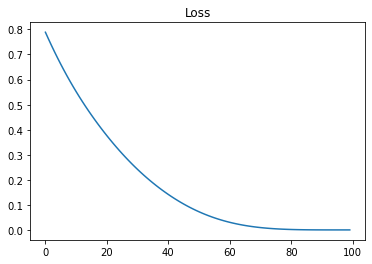

In [13]:
#(6) 훈련 과정의 손실함수 시각화하기. 
plt.plot(model_2_fit.history['loss'])
plt.title('Loss')
plt.show()